# 4장 신경망 학습

In [81]:
import numpy as np

In [82]:
def mean_squared_error(y,t):
    return 0.5*np.sum((y-t)**2)

t=[0,0,1,0,0,0,0,0,0,0]
y=[0.1 , 0.05, 0.1, 0.0 , 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

mean_squared_error(np.array(y),np.array(t))


0.5975

# 평균 제곱 오차

In [83]:
def mean_squared_error(y,t):
    return 0.5*np.sum((y-t)**2)

t=[1,0,0,0,0,0,0,0,0,0]
y=[1 , 0,0,0,0,0,0,0,0,0]

mean_squared_error(np.array(y),np.array(t))


0.0

In [84]:
import math

print(math.log(4,2))
print(math.log(8,2))


2.0
3.0


# 교차엔트로피

In [85]:
def cross_entropy_error(y,t):
    delta=1e-7
    return -np.sum(t*np.log(y+delta))

t=[0,0,1,0,0,0,0,0]
y=[0.1 , 0.05, 0.6,0.0 , 0.0, 0.05, 0.1 , 0.0]

cross_entropy_error(np.array(y),np.array(t))

0.510825457099338

# 미니배치

### 손글씨 불러오기

In [86]:
import numpy as np
import os
# 손글씨 불러오기
def load_mnist(flatten=False, normalize=True, one_hot_label=False):
    files = ['./train-images.idx3-ubyte', './train-labels.idx1-ubyte',
             './t10k-images.idx3-ubyte', './t10k-labels.idx1-ubyte']
    
    # Check if files exist
    for file in files:
        if not os.path.exists(file):
            raise FileNotFoundError(f'{file} not found in the current directory.')

    def load_images(file_name):
        with open(file_name, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
        if flatten:
            data = data.reshape(-1, 784)
        else:
            data = data.reshape(-1, 28, 28)
        if normalize:
            data = data / 255.0
        return data

    def load_labels(file_name):
        with open(file_name, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=8)
        return data

    # Load data
    x_train = load_images('./train-images.idx3-ubyte')
    t_train = load_labels('./train-labels.idx1-ubyte')
    x_test = load_images('./t10k-images.idx3-ubyte')
    t_test = load_labels('./t10k-labels.idx1-ubyte')

    return (x_train, t_train), (x_test, t_test)


# [ load_mnist ]
# # normalize: 입력 이미지의 픽셀 값을 0.0~ 1.0사이의 값으로 정규화 할지 정함
# # flatten: 입력 이미지를 1차원 배열로 만들지를 정함
# # one_hot_label: 원핫 인코딩 형태로 저장할지 정함(정답인 원소만 1, 나머지는 0인 배열)
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True,one_hot_label=True)
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)



KeyboardInterrupt



In [ ]:
train_size=x_train.shape[0]  # 60000
batch_size=10
batch_mask = np.random.choice(train_size,batch_size)  # => choice(60000,10)  60000미만의 수중에서 무작위로 10개를 골라냄
x_batch= x_train[batch_mask]  # x_train(28x28사이즈 크기 6만개 이미지 데이터)중 10개 랜덤
t_batch=t_train[batch_mask] # t_train(0~9까지 숫자 데이터 6만개)중 10개 랜덤

print(x_batch)  
print(t_batch)
x_batch.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[1 1 0 5 7 8 6 9 5 2]


(10, 784)

# (배치용) 교차 엔트로피 오차 구현

### 원핫인코딩으로 주어진 경우

In [ ]:
def cross_entropy_error(y,t):
    if y.ndim==1:
        t=t.reshape(1,t.size)
        y=y.reshape(1,y.size)
    batch_size=y.shape[0]
    return -np.sum(t*np.log(y+1e-7))/batch_size 



### 정답(t)가 정수형 클래스 레이블로 주어짐

In [ ]:
def cross_entropy_error(y,t):
    if y.ndim==1:
        t=t.reshape(1,t.size)
        y=y.reshape(1,y.size)
    print(y.shape[0]) # 1
    print(y.shape)# 1,8
    batch_size=y.shape[0] # 1

    print(np.arange(batch_size)) # batch_size가 1이므로 [0]이라는 넘파이 생성 -> 만약 batch_size가 5면 [0,1,2,3,4]배열 생성
    print("f",t,"f",y)
    print(y[np.arange(batch_size),t]+1e-7)
    return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7))/batch_size # 1e-7은 매우작은 값으로 log(0)의 -inf 출력 방지를 위해 더해줌

t=[0,0,1,0,0,0,0,0]
y=[0.1 , 0.05, 0.6,0.0 , 0.0, 0.05, 0.1 , 0.0]

cross_entropy_error(np.array(y),np.array(t))

1
(1, 8)
[0]
f [[0 0 1 0 0 0 0 0]] f [[0.1  0.05 0.6  0.   0.   0.05 0.1  0.  ]]
[[0.1000001 0.1000001 0.0500001 0.1000001 0.1000001 0.1000001 0.1000001
  0.1000001]]


19.113818924517812

# axis 0,1,2 - 첫번째 차원 a, 두번째차원b, 세번째차원c y[a][b][c]


In [ ]:
#### 이는 가장 바깥쪽 차원으로, 배열 y에는 두 개의 2차원 배열이 있습니다. 따라서 y.shape[0]는 2입니다
y = np.array([
    [[0.1, 9.2,1.7, 0.7],[0.1, 0.9, 0.2, 0.7],[0.1, 0.7, 0.2, 0.7]]
    ,[[0.1, 0.7, 0.2, 0.7],[0.1, 0.7, 0.2, 0.7],[0.1, 0.7, 0.2, 0.7]]
    ])
y.shape   # (2,3,4)
y[0][1][2]

0.2

In [ ]:
train_size=x_train.shape[0]  # 60000
batch_size=10
batch_mask = np.random.choice(train_size,batch_size)  # => choice(60000,10)  60000미만의 수중에서 무작위로 10개를 골라냄
x_batch= x_train[batch_mask]  # x_train(28x28사이즈 크기 6만개 이미지 데이터)중 10개 랜덤
t_batch=t_train[batch_mask] # t_train(0~9까지 숫자 데이터 6만개)중 10개 랜덤

print(x_batch)  
print(t_batch)
x_batch.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[2 1 4 7 4 2 3 3 8 2]


(10, 784)

# 손실함수 설정 이유?
> 높은 정확도를 끌어내는 매개변수를 찾는것

# 수치미분


#### 나쁜 구현예

In [ ]:
def numerical_diff(f,x):
    h=10e-50
    return (f(x+h)-f(x))/h

# 문제점 1 > 10e-50으로 아주  작은 값을 나타내려 했으나 10e-8(소수점 8자리 이하)는 [반올림 오차] 문제 발생
np.float32(1e-50) # 너무 작은 값이므로 0이 출력된다

# 문제점 2> 함수 f의 차분(두점에서의 함수 값들의 차이)


0.0

중심 차분이 전진 차분보다 더 정확한 이유는 중심 차분이 함수의 변화율을 보다 정확하게 반영하기 때문입니다.<br>
 이를 더 구체적으로 이해하기 위해, 테일러 급수를 사용한 수치적 분석을 살펴보겠습니다.<br>
 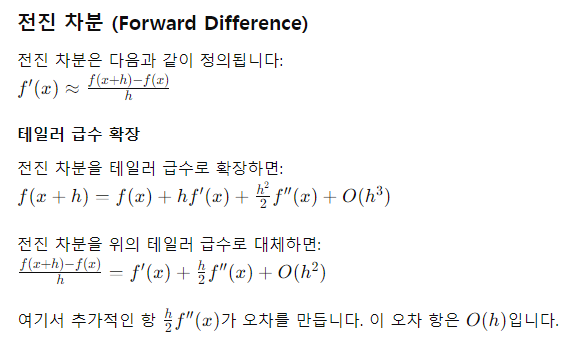<br>
 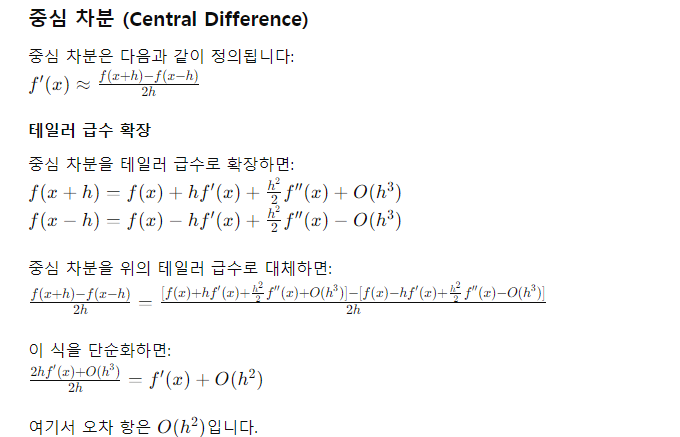<br>
 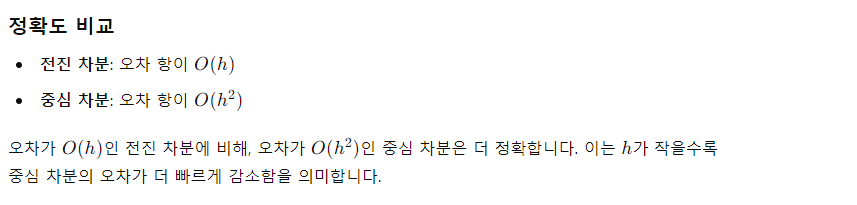

In [ ]:
# 중심 차분
def numerical_diff(f,x):
    h=1e-4
    return (f(x+h)-f(x-h)/(2*h))

## 수치 미분의 예

function_1 <br>
$ y=  0.01x^2 + 0.1x $에 대한 함수 


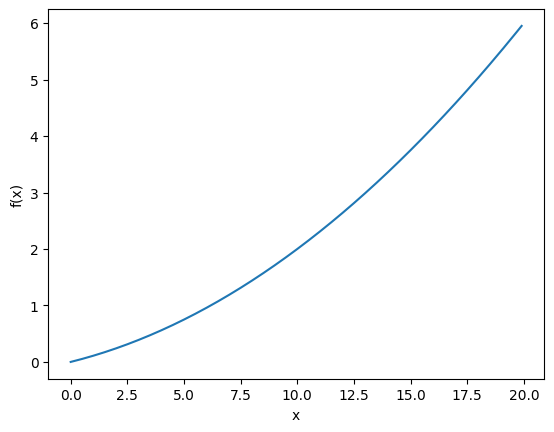

In [ ]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

import numpy as np
import matplotlib.pylab as plt

# 0.01*x**2 + 0.1*x의 그래프
x=np.arange(0.0,20.0,0.1)
y=function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [ ]:
# 0.01*x**2 + 0.1*x 에서 x=5일때와 10일때 함수의 미분계산
# 중심 차분
def numerical_diff(f,x):
    h=1e-4
    return (f(x+h)-f(x-h))/(2*h)

print(numerical_diff(function_1,5))
print(numerical_diff(function_1,10))

0.1999999999990898
0.2999999999986347


# 편미분

function_2 함수<br> 
$ f(x_0, x_1) = x_0^2+x_1^2 $   

In [ ]:
#  단순히 인수들의 제곱합을 계산하는 식
def function_2(x): # 인수 x는 넘파이 배열이라고 가정
    return x[0]**2 + x[1]**2
# 또는 return np.sum(x)



### 위에 식 $ f(x_0, x_1) = x_0^2+x_1^2 $ 을 미분
> ### 1. $ x_0 $ vs $ x_1 $ 어느 변수에 대한 미분인지를 구별해야함
> ### 변수가 여럿인 함수에 대한  미분을 편미분이라고 함

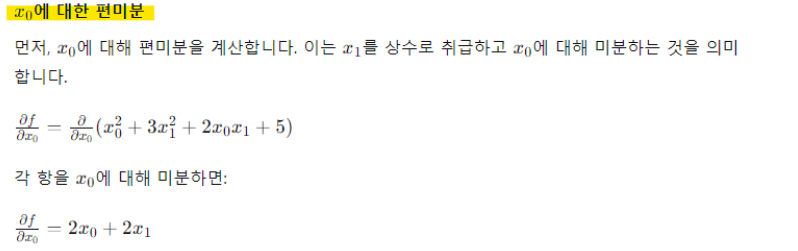
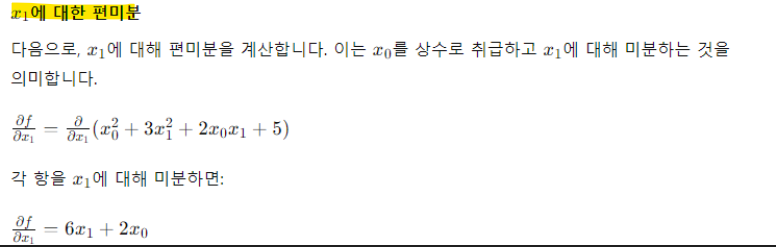

In [ ]:
def numerical_diff(f,x):
    h=1e-4
    return (f(x+h)-f(x-h))/(2*h)
#  x0=3,  x1=4일때 x0에 대한 편미분
def function_tmp1(x0):
    return x0*x0 +  4.0**2.0

numerical_diff(function_tmp1,3.0)


6.00000000000378

In [ ]:
#  x0=3,  x1=4일때 x0에 대한 편미분
def function_tmp2(x1):
    return 3**2 + x1*x1

numerical_diff(function_tmp2)

7.999999999999119

# 기울기

> ### 위에 식 $ f(x_0, x_1) = x_0^2+x_1^2 $ 을 미분할때 편미분 - > 변수별로 했음
> #### 동시에 계산할땐 $ f(x_0, x_1) $ 양쪽의 편미분을 묶어서 게산
> #### 모든 변수의 편미분을 벡토로 정리한것을 기울기라 함

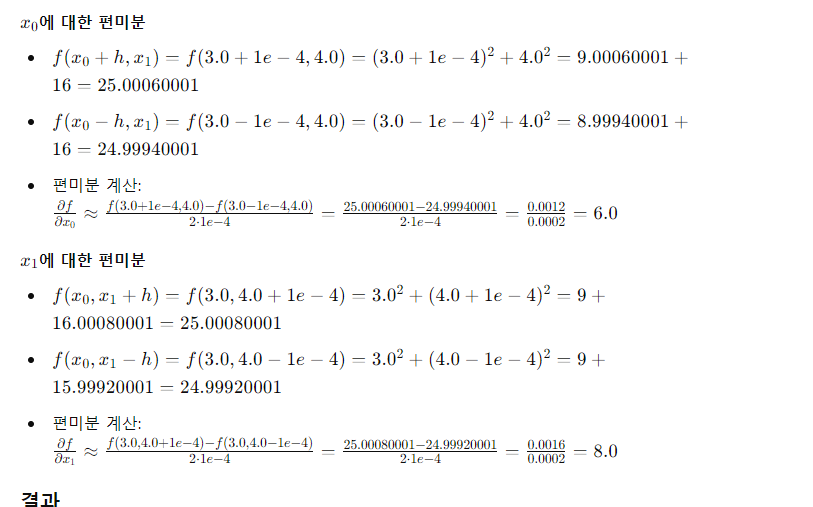

In [ ]:
# 인수인 f는 함수, x는 넘파이 배열
#  -> 넘파이 배열 x의 각 원소에 대해 수치 미분을 구함
def numerical_gradient(f,x):
    h=1e-4
    grad=np.zeros_like(x)

    for idx in range(x.size):
        tmp_val=x[idx]


        # f(x+h) 계산
        x[idx]=tmp_val + h
        fxh1=f(x)

        # f(x-h) 계산
        x[idx]=tmp_val-h
        fxh2=f(x)

        grad[idx]=(fxh1-fxh2)/(2*h)
        x[idx] =tmp_val # 값 복원
    return grad


In [88]:


numerical_gradient(function_2,np.array([3.0,4.0]))
numerical_gradient(function_2,np.array([0.0,2.0]))
numerical_gradient(function_2,np.array([3.0,0.0]))



array([6., 0.])

# 경사하강법
> 손실함수가 최솟값이 되는 매개변수 값

In [89]:
def gradient_descent(f,init_x,lr=0.01,step_num=100):
    x=init_x
    for i in  range(step_num):

        grad=numerical_gradient(f,x)
        x-=lr*grad
    return x

In [91]:
def function_2(x):
    return x[0]**2+x[1]**2
init_x=np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x,lr=0.1,step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [94]:
# 학습률이 너무 큰 lr= 10.0
init_x=np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x,lr=10.0,step_num=100)




array([-2.58983747e+13, -1.29524862e+12])

In [93]:

# 학습률이 너무 작은 lr= 1e -10
init_x=np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x,lr=1e-10,step_num=100)


array([-2.99999994,  3.99999992])